In [1]:
#required imports
from sklearn.neural_network import MLPRegressor
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error  
from math import sqrt 

In [2]:
#load features
features = pd.read_csv("features.csv")
features.head()

,Day,Month,Season,Weekday,Holiday,Daily Weather,Daily Weather (Past),Humidity,Humidity (Past),Windspeed,Windspeed (Past),Apparent Temperature (Avg),Apparent Temperature (Avg) (Past),Rented Bikes,Rented Bikes (Future)
0,1,January,Winter,Monday,False,partly-cloudy-day,fog,0.88,0.94,1.59,0.55,46.740,36.295,281,279
1,2,January,Winter,Tuesday,False,partly-cloudy-day,partly-cloudy-day,0.86,0.88,2.07,1.59,42.150,46.740,279,274
2,3,January,Winter,Wednesday,False,clear-day,partly-cloudy-day,0.86,0.86,4.13,2.07,45.450,42.150,274,161
3,4,January,Winter,Thursday,False,rain,clear-day,0.87,0.86,3.60,4.13,46.200,45.450,161,270
4,5,January,Winter,Friday,False,partly-cloudy-day,rain,0.81,0.87,7.43,3.60,56.085,46.200,270,62


In [3]:
#transorm non-numerical labels to numerical labels
le = LabelEncoder()
features.loc[:,'Holiday'] = le.fit_transform(features['Holiday'])
features.head()
features.shape


(1514, 15)

In [4]:
cleanup_nums = {"Month":   {"January": 1, "February": 2, "March": 3, "April": 4, "May": 5, "June": 6, "July": 7, "August": 8, "September": 9, "October": 10, "November": 11, "December": 12},
               "Season": {"Spring": 1, "Summer": 2, "Autumn": 3, "Winter": 4},
               "Weekday": {"Monday": 1, "Tuesday": 2, "Wednesday": 3, "Thursday": 4,
                                  "Friday": 5, "Saturday": 6, "Sunday":7 },
               "Daily Weather": {"clear-day": 1, "partly-cloudy-day": 2,"cloudy":3,"wind":4, "rain": 5, "fog": 6, "snow": 7},
               "Daily Weather (Past)": {"clear-day": 1, "partly-cloudy-day": 2,"cloudy":3,"wind":4, "rain": 5,"fog": 6, "snow": 7} }

In [5]:
features.replace(cleanup_nums, inplace=True)


In [6]:
features

,Day,Month,Season,Weekday,Holiday,Daily Weather,Daily Weather (Past),Humidity,Humidity (Past),Windspeed,Windspeed (Past),Apparent Temperature (Avg),Apparent Temperature (Avg) (Past),Rented Bikes,Rented Bikes (Future)
0,1,1,4,1,0,2,6,0.88,0.94,1.59,0.55,46.740,36.295,281,279
1,2,1,4,2,0,2,2,0.86,0.88,2.07,1.59,42.150,46.740,279,274
2,3,1,4,3,0,1,2,0.86,0.86,4.13,2.07,45.450,42.150,274,161
3,4,1,4,4,0,5,1,0.87,0.86,3.60,4.13,46.200,45.450,161,270
4,5,1,4,5,0,2,5,0.81,0.87,7.43,3.60,56.085,46.200,270,62
5,6,1,4,6,0,2,2,0.74,0.81,7.05,7.43,44.615,56.085,62,48
6,7,1,4,7,0,1,2,0.74,0.74,5.44,7.05,43.385,44.615,48,252
7,8,1,4,1,0,5,1,0.83,0.74,6.57,5.44,49.535,43.385,252,311
8,9,1,4,2,0,2,5,0.84,0.83,4.12,6.57,39.870,49.535,311,305
9,10,1,4,3,0,1,2,0.76,0.84,5.04,4.12,42.130,39.870,305,264


In [7]:
#target variable
y = features['Rented Bikes'].tolist()


In [8]:
#Feature Matrix with past and today data
X=features.loc[:,['Day','Month','Season','Weekday','Daily Weather','Daily Weather (Past)','Humidity','Humidity (Past)','Windspeed', 'Windspeed (Past)', 'Apparent Temperature (Avg)','Apparent Temperature (Avg) (Past)','Rented Bikes (Future)']]
X.head()

,Day,Month,Season,Weekday,Daily Weather,Daily Weather (Past),Humidity,Humidity (Past),Windspeed,Windspeed (Past),Apparent Temperature (Avg),Apparent Temperature (Avg) (Past),Rented Bikes (Future)
0,1,1,4,1,2,6,0.88,0.94,1.59,0.55,46.740,36.295,279
1,2,1,4,2,2,2,0.86,0.88,2.07,1.59,42.150,46.740,274
2,3,1,4,3,1,2,0.86,0.86,4.13,2.07,45.450,42.150,161
3,4,1,4,4,5,1,0.87,0.86,3.60,4.13,46.200,45.450,270
4,5,1,4,5,2,5,0.81,0.87,7.43,3.60,56.085,46.200,62


In [9]:
X_train =X.loc[0:1211]
X_test= X.loc[1212:1514]
y_train = y[0:1212]
y_test=y[1212:1514]
y_test

[396,
 381,
 409,
 366,
 81,
 112,
 396,
 388,
 372,
 286,
 272,
 72,
 87,
 86,
 299,
 330,
 356,
 279,
 88,
 94,
 360,
 346,
 357,
 389,
 317,
 90,
 90,
 379,
 374,
 374,
 382,
 324,
 79,
 101,
 406,
 388,
 392,
 374,
 359,
 92,
 89,
 360,
 387,
 377,
 394,
 320,
 80,
 102,
 383,
 374,
 391,
 395,
 343,
 80,
 108,
 378,
 398,
 387,
 394,
 322,
 91,
 90,
 361,
 423,
 394,
 395,
 319,
 104,
 103,
 382,
 360,
 397,
 377,
 274,
 91,
 43,
 358,
 383,
 355,
 397,
 315,
 97,
 102,
 340,
 353,
 325,
 235,
 274,
 68,
 57,
 331,
 344,
 389,
 258,
 312,
 70,
 96,
 354,
 352,
 339,
 288,
 242,
 70,
 18,
 64,
 326,
 176,
 335,
 262,
 83,
 96,
 379,
 340,
 389,
 346,
 287,
 87,
 74,
 321,
 371,
 328,
 388,
 317,
 94,
 94,
 397,
 400,
 370,
 349,
 285,
 46,
 40,
 373,
 383,
 443,
 376,
 372,
 63,
 99,
 387,
 404,
 398,
 369,
 345,
 29,
 72,
 391,
 390,
 353,
 389,
 348,
 83,
 40,
 301,
 386,
 333,
 364,
 325,
 95,
 77,
 332,
 347,
 389,
 345,
 237,
 49,
 46,
 360,
 339,
 283,
 373,
 284,
 42,
 60,
 

In [10]:
#Split into train and test set
#X_train  1211
#X_test = 303
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train

,Day,Month,Season,Weekday,Daily Weather,Daily Weather (Past),Humidity,Humidity (Past),Windspeed,Windspeed (Past),Apparent Temperature (Avg),Apparent Temperature (Avg) (Past),Rented Bikes (Future)
0,1,1,4,1,2,6,0.88,0.94,1.59,0.55,46.740,36.295,279
1,2,1,4,2,2,2,0.86,0.88,2.07,1.59,42.150,46.740,274
2,3,1,4,3,1,2,0.86,0.86,4.13,2.07,45.450,42.150,161
3,4,1,4,4,5,1,0.87,0.86,3.60,4.13,46.200,45.450,270
4,5,1,4,5,2,5,0.81,0.87,7.43,3.60,56.085,46.200,62
5,6,1,4,6,2,2,0.74,0.81,7.05,7.43,44.615,56.085,48
6,7,1,4,7,1,2,0.74,0.74,5.44,7.05,43.385,44.615,252
7,8,1,4,1,5,1,0.83,0.74,6.57,5.44,49.535,43.385,311
8,9,1,4,2,2,5,0.84,0.83,4.12,6.57,39.870,49.535,305
9,10,1,4,3,1,2,0.76,0.84,5.04,4.12,42.130,39.870,264


In [11]:
#initialize MLPRegressor
mlp = MLPRegressor(
    hidden_layer_sizes=(10,5),  activation='relu', solver='lbfgs', alpha=0.001, batch_size='auto',
    learning_rate='constant', learning_rate_init=0.01, power_t=0.5, max_iter=1000, shuffle=True,
    random_state=9, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,
    early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

m = mlp.fit(X_train_scaled,y_train)

predictions = m.predict(X_test_scaled)
len(predictions)

302

In [12]:
#Print scores
print("Training set score: %f" % m.score(X_train_scaled, y_train))
print("Test set score: %f" % m.score(X_test_scaled, y_test))

Training set score: 0.591888
Test set score: 0.374739


In [13]:
#Compare predicted and actual values
df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})  
df.head()

,Actual,Predicted
0,396,408.856285
1,381,346.855812
2,409,278.100201
3,366,233.972808
4,81,169.138396


## RMSE = Root Mean Square Error 
is a frequently used measure of the differences between values predicted by a model. 

It is the standard deviation of prediction errors.<br>
[RMSE](https://www.statisticshowto.datasciencecentral.com/rmse/) answers the question of how concentrated the data is around the line of best fit.
![](img/rmse.png)
Where:<br>
f = forecasts (expected values or unknown results)<br>
o = observed values (known results)

In [14]:
#RMSE
a=df.loc[:,'Actual']
b=df.loc[:,'Predicted']
rmse=sqrt(mean_squared_error(a, b))  
"The root mean square error of the model is {0:.3f}".format(rmse) 

'The root mean square error of the model is 103.878'

In [15]:
y_train
df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})  
df.head()

,Actual,Predicted
0,396,408.856285
1,381,346.855812
2,409,278.100201
3,366,233.972808
4,81,169.138396


In [21]:
#X_train.set_index('Day', inplace=True)
X_train.head()

,Day,Month,Season,Weekday,Daily Weather,Daily Weather (Past),Humidity,Humidity (Past),Windspeed,Windspeed (Past),Apparent Temperature (Avg),Apparent Temperature (Avg) (Past),Rented Bikes (Future)
0,1,1,4,1,2,6,0.88,0.94,1.59,0.55,46.740,36.295,279
1,2,1,4,2,2,2,0.86,0.88,2.07,1.59,42.150,46.740,274
2,3,1,4,3,1,2,0.86,0.86,4.13,2.07,45.450,42.150,161
3,4,1,4,4,5,1,0.87,0.86,3.60,4.13,46.200,45.450,270
4,5,1,4,5,2,5,0.81,0.87,7.43,3.60,56.085,46.200,62


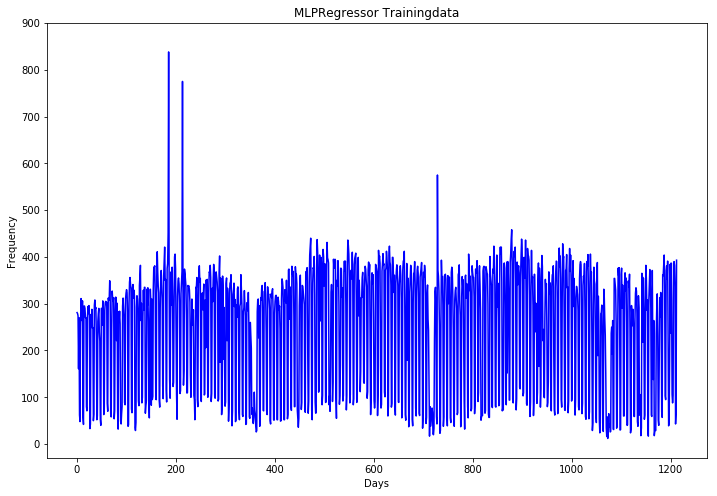

In [31]:
plt.figure(figsize=(26,8))
plt.subplot(121)
plt.plot(X_train.values[:,0], y_train, color = 'blue',label='Actual Value') 
#plt.plot(X_test.values[:,0], y_test, color = 'red',label='Predicted Value') 
#plt.legend()
plt.yticks(np.arange(0, 1000, step=100))
#plt.xticks(np.arange(0, 1000, step=100))
plt.title("MLPRegressor Trainingdata")
plt.ylabel("Frequency")
plt.xlabel("Days")
plt.show() 